## Final report  
Wenjia Bao

In [1]:
# import oss2
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
import copy
from sklearn.cluster import KMeans
from datetime import datetime

In [2]:
#setting configuration
pd.options.display.max_columns = 10
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.ion()

In [3]:
# read in the merged data
df = pd.read_csv('subscribers.csv')
df_1 = pd.read_pickle('customer_service_reps')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [5]:
df.head(10)

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,...,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,...,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,...,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,...,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,...,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,...,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
5,284782,24810928,base,NaN,comedy,...,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True
6,192823,29726122,base,2.0,comedy,...,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True
7,315863,20299962,base,3.0,drama,...,1,2020-03-19 14:52:22,2020-07-19 14:52:22,NaN,True
8,254782,24930568,base,NaN,comedy,...,1,2020-03-08 17:50:25,2020-07-08 17:50:25,NaN,True
9,681969,23452753,economy,3.0,drama,...,0,NaN,NaN,2020-01-27 00:00:00,False


In [6]:
df.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,...,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,227628.000000,2.276280e+05,117178.000000,189698.000000,115458.000000,...,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,341129.200041,2.498624e+07,3.008824,27.997724,2.061260,...,4.732049,4.512188,0.115145,13.989544,0.790122
std,197094.201084,2.885543e+06,0.820526,4.976341,0.245907,...,0.101049,0.097078,0.176971,0.382453,0.777713
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,...,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,170766.250000,2.248998e+07,2.000000,24.401536,2.000000,...,4.734300,4.514100,0.036700,14.000000,0.000000
50%,340985.500000,2.497011e+07,3.000000,27.301448,2.000000,...,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511844.000000,2.749020e+07,3.000000,30.201361,2.000000,...,4.734300,4.514100,0.110100,14.000000,1.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,...,5.101300,5.027900,0.734000,14.000000,3.000000


In [7]:
df.attribution_survey.value_counts().index

Index(['facebook', 'tv', 'referral', 'search', 'pinterest', 'other',
       'public_radio', 'social_organic', 'youtube', 'podcast', 'affiliate',
       'ott', 'sirius xm', 'facebook_organic', 'direct_mail', 'amfm_radio'],
      dtype='object')

In [8]:
df.weekly_consumption_hour.describe()

count    189698.000000
mean         27.997724
std           4.976341
min         -32.146760
25%          24.401536
50%          27.301448
75%          30.201361
max          76.599962
Name: weekly_consumption_hour, dtype: float64

In [9]:
df.trial_completed.value_counts()

True     200236
False     27392
Name: trial_completed, dtype: int64

In [10]:
df.monthly_price.value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
0.8074         1
1.1744         1
4.6976         1
Name: monthly_price, dtype: int64

In [11]:
df.attribution_technical.value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
appstore                      44
criteo                        44
pinterest_organic             30
influencer                    21
playstore                     12
content_gr

In [12]:
df.attribution_survey.value_counts()

facebook            119126
tv                   39904
referral             20882
search                8492
pinterest             7856
other                 6496
public_radio          6219
social_organic        3869
youtube               3108
podcast               2995
affiliate             1962
ott                   1443
sirius xm             1122
facebook_organic       765
direct_mail            408
amfm_radio             337
Name: attribution_survey, dtype: int64

## Data preperation

In [13]:
# abort the first meaningless column
# df = df.iloc[:, 1:]

# deal with the abnormal data in 'age' attribute
df.loc[df['age'] > 1900, 'age'] = 2020 - df['age'][df['age'] > 1900]
df.loc[df['age'] > 120, 'age'] = np.nan
df.loc[df['age'] <= 0, 'age'] = np.nan
df['age'] = round(df['age'], 0)
for col in df.columns:
    if col.__contains__('date'):
        df[col] = pd.to_datetime(df[col])

# drop NAs
df.dropna(axis = 0, subset = ['weekly_consumption_hour', 'male_TF', 'intended_use'], inplace = True)
df.isna().sum()

Unnamed: 0                           0
subid                                0
package_type                     32843
num_weekly_services_utilized     73333
preferred_genre                  32923
intended_use                         0
weekly_consumption_hour              0
num_ideal_streaming_services     73688
age                                185
male_TF                              0
country                              0
attribution_technical                0
attribution_survey                 517
op_sys                           12358
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                             0
language                             0
payment_type                    132825
num_trial_days                       0
current_sub_TF           

start time:2019-06-30 00:00:19
 end time2020-03-27 23:59:06


<ipython-input-14-ea37d3e0b9b2>:97: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, i + 1)


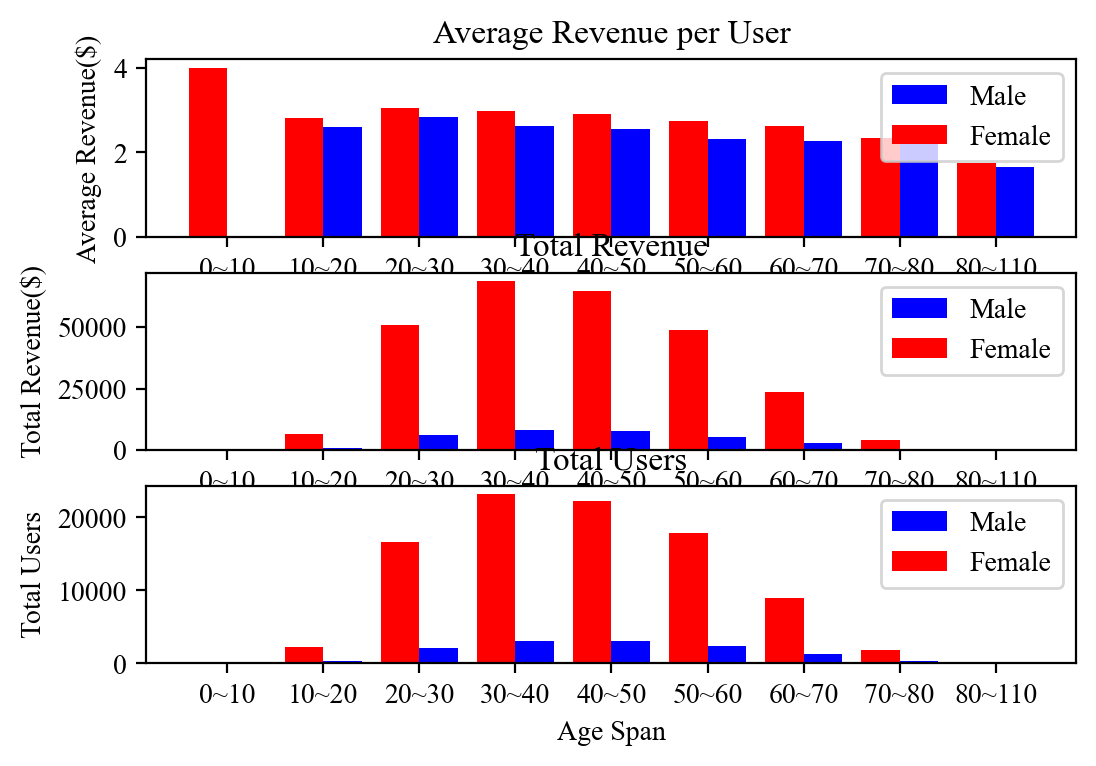

In [14]:



# time range
print('start time:' + str(min(df['account_creation_date'])) + '\n', 'end time' + str(max(df['account_creation_date'])))

# statictics on useful attributes of subscribers

categorical_attributes = ['package_type', 'preferred_genre', 'intended_use', 'num_weekly_services_utilized',
                          'country', 'attribution_technical', 'attribution_survey', 'op_sys',
                          'months_per_bill_period', 'monthly_price', 'discount_price',
                          'language', 'payment_type', 'payment_period', 'num_trial_days',
                          'num_ideal_streaming_services', 'join_fee', 'age', 'plan_type'
                          ]

# TODO:wha's the differnece between months_per_bill_period and payment_period
numerical_attributes = ['weekly_consumption_hour']
count_ls = []
for col in categorical_attributes:
    counts = df[col].value_counts()
    count_ls.append(counts)
categorical_attributes_statistics_dic = dict(zip(categorical_attributes, count_ls))


hist_ls = []
for col in numerical_attributes:
    data = df[col].dropna()
    r = pd.cut(data, 20)
    counts = r.value_counts()
    hist_ls.append(counts)
numerical_attributes_statistics_dic = dict(zip(numerical_attributes, hist_ls))

# calculate average revenue per person(only take into account the subscriber, current and past )
df_revenue = df.copy()
df_revenue = df_revenue.loc[-pd.isna(df_revenue['last_payment'])]
df_revenue['last_payment'] = pd.to_datetime(df_revenue['last_payment'])
df_revenue['trial_end_date'] = pd.to_datetime(df_revenue['trial_end_date'])
diff = df_revenue['last_payment'] - df_revenue['trial_end_date']
diff = round(diff/pd.Timedelta(30, unit='D'), 0) + df_revenue['payment_period']
# diff = diff.fillna(0)
revenue = diff * df_revenue['discount_price']
mean_revenue = revenue.mean()

# calculate total revenue according different platform
revenue_platform = {}
attribution_group = df_revenue.groupby('attribution_technical')
for platform, indexes in attribution_group.groups.items():
    revenue_platform[platform] = (diff.loc[indexes].mean(), diff.loc[indexes].sum(), len(indexes))

# analysis by ages with gender
# divide the people by 10 years old interval
df_age = df_revenue.copy()
df_age = df_age.dropna(subset=['age'])
df_age['age'] = pd.cut(df_age['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 110])
age_gender = df_age.groupby(['age', 'male_TF'])
gender_age_revenue = {}
for age_gender_span, indexes in age_gender.groups.items():
    # mean, sum, number
    if np.isnan(age_gender_span[1]):
        continue
    gender_age_revenue[age_gender_span] = (diff.loc[indexes].mean(), diff.loc[indexes].sum(), len(indexes))
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
total_width = 0.8
width_bar = total_width / 2

intervals = []
x = []
male_value = [[], [], []]
female_value = [[], [], []]

for _, (key, value) in enumerate(gender_age_revenue.items()):
    if key[1]:
        male_value[0].append(value[0])
        male_value[1].append(value[1])
        male_value[2].append(value[2])
    else:
        female_value[0].append(value[0])
        female_value[1].append(value[1])
        female_value[2].append(value[2])
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.bar(np.array(range(2, 10)) + 0.2, male_value[i], width=0.4, label='Male', color='blue')

for i, ax in enumerate([ax1, ax2, ax3]):
    ax.bar(np.array(range(1, 10)) - 0.2, female_value[i], width=0.4, label='Female', color='red')
ax1.set_title('Average Revenue per User')
ax2.set_title('Total Revenue')
ax3.set_title('Total Users')
ax1.set_xticks([])
ax1.set_ylabel('$')
ax1.set_ylabel('Average Revenue($)')
ax2.set_ylabel('Total Revenue($)')
ax3.set_ylabel('Total Users')
ax2.set_xticks([])

intervals = ['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~110']
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.xticks(range(1, 10), intervals)
    plt.xlabel('Age Span')
    plt.legend()
plt.show()

# trial -> subscribe total and gender_age
df_trial_subscribe = df.copy()
# choose the trial plan type
df_trial_subscribe = df_trial_subscribe[-df_trial_subscribe['plan_type'].str.contains('no_trial')]
num_subscribe = len(np.flatnonzero(-pd.isna(df_trial_subscribe['last_payment'])))
subscribe_ratio = num_subscribe/df_trial_subscribe.shape[0]

df_trial_subscribe['age'] = pd.cut(df_trial_subscribe['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf])
trial_suc_gender_age = {}
for age_gender_span, indexes in df_trial_subscribe.groupby(['age', 'male_TF']).groups.items():
    num_subscribe = len(np.flatnonzero(-pd.isna(df_trial_subscribe.loc[indexes, 'last_payment'])))
    subscribe_ratio = num_subscribe / len(indexes)
    # ratio, actual number
    trial_suc_gender_age[age_gender_span] = (subscribe_ratio, num_subscribe)


In [15]:
y_col_name = 'current_sub_TF'
x_col_name = ['intended_use', 'male_TF', 'attribution_technical', 'package_type', 'preferred_genre']
dummy_df = pd.get_dummies(df[x_col_name])
dummy_df

,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,...,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional
1,1,0,0,0,0,...,1,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,1
3,0,0,0,0,0,...,0,1,0,0,0
4,0,0,0,0,0,...,1,0,0,0,0
5,1,0,0,0,0,...,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
227622,1,0,0,0,0,...,0,1,0,0,0
227623,0,0,0,0,0,...,1,0,0,0,0
227624,0,0,0,0,0,...,1,0,0,0,0
227625,1,0,0,0,0,...,1,0,0,0,0


# Customer Segmentation

In [16]:
df_segmentation = df.merge(dummy_df, left_index = True, right_index = True)
df_segmentation.drop(x_col_name, axis = 1, inplace = True)

In [17]:
df_segmentation

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,...,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional
1,380374,23383224,NaN,22.951579,NaN,...,1,0,0,0,0
2,496617,26844789,3.0,36.001186,2.0,...,0,0,0,0,1
3,356799,29417030,NaN,20.051667,NaN,...,0,1,0,0,0
4,681701,26723159,4.0,22.951579,3.0,...,1,0,0,0,0
5,284782,24810928,NaN,20.051667,NaN,...,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
227622,603751,25835684,2.0,24.401536,2.0,...,0,1,0,0,0
227623,509326,21434712,3.0,28.751405,2.0,...,1,0,0,0,0
227624,229587,25843074,2.0,27.301448,2.0,...,1,0,0,0,0
227625,281340,24799085,NaN,31.651317,NaN,...,1,0,0,0,0


In [18]:
dummy_name = ['attribution_survey', 'op_sys']

In [19]:
scaler = StandardScaler()

## Segment by consumption time

In [20]:
df_segmentation_time = df_segmentation.merge(dummy_df, left_index=True, right_index=True)
df_segmentation_time.drop(dummy_name, axis = 1, inplace = True)
df_segmentation_time.weekly_consumption_hour = scaler.fit_transform(df_segmentation_time.weekly_consumption_hour.values.reshape(-1,1))

## Find K

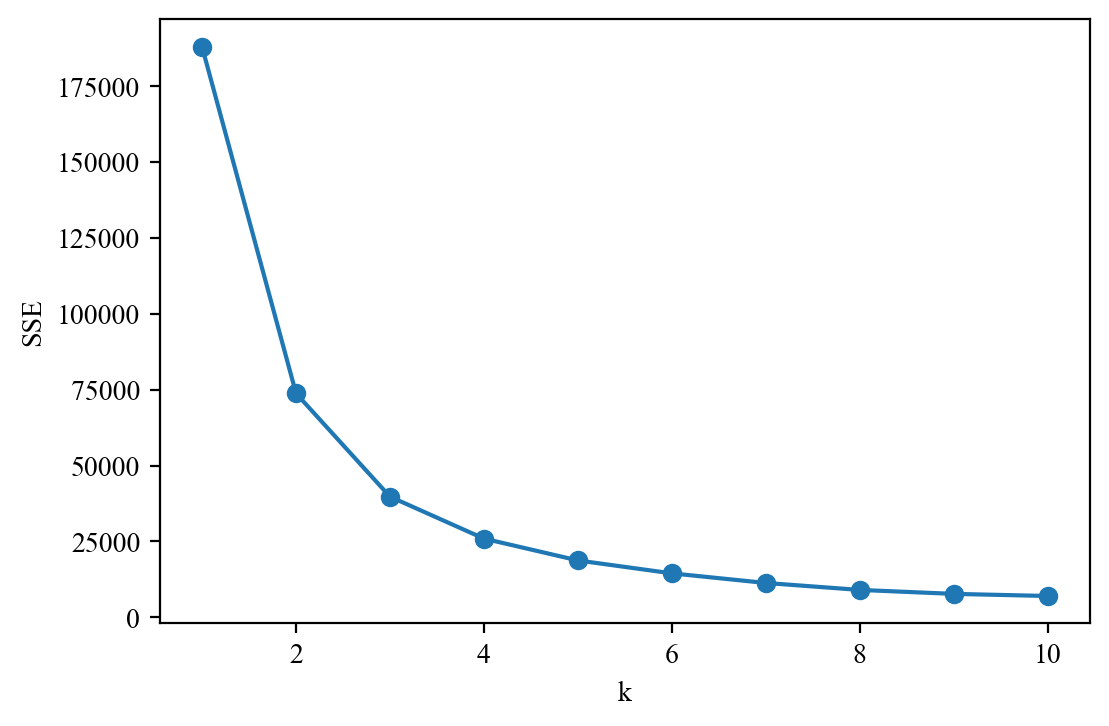

In [21]:
SSE = []
for k in range(1, 11):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df_segmentation_time['weekly_consumption_hour'].values.reshape(-1,1))
    SSE.append(estimator.inertia_)
X = range(1, 11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

### Set k = 3

In [22]:
kmeans = KMeans(n_clusters = 3, random_state = 6).fit(df_segmentation_time['weekly_consumption_hour'].values.reshape(-1,1))
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_
centroids


array([[ 0.23566938],
       [-0.87160878],
       [ 1.61976834]])

In [23]:
df_segmentation_time['clusters'] = clusters
df_segmentation_time.groupby('clusters').mean()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,...,preferred_genre_comedy_y,preferred_genre_drama_y,preferred_genre_international_y,preferred_genre_other_y,preferred_genre_regional_y
clusters,,,,,,,,,,,
0,377213.740841,2.498679e+07,3.092496,0.235669,2.067112,...,0.518280,0.202528,0.032856,0.020988,0.046412
1,383857.259671,2.499194e+07,2.720229,-0.871609,2.043393,...,0.534564,0.200582,0.028158,0.018170,0.037770
2,354529.403948,2.497619e+07,3.533982,1.619768,2.092257,...,0.472390,0.253935,0.040392,0.023171,0.057644


# Attribution & Allocation

In [24]:
df = pd.read_csv('subscribers.csv')
df.dropna(axis = 0, subset = ['attribution_survey'], inplace = True)
df_spend = pd.read_csv('channel_spend_graduate.csv')

In [25]:
df['month'] = pd.DatetimeIndex(df.account_creation_date).month
df['year'] = pd.DatetimeIndex(df.account_creation_date).year

In [26]:
df.month.value_counts()

2     27843
11    26647
7     25316
3     25275
8     25271
12    25130
1     24583
10    22239
9     20056
6      2624
Name: month, dtype: int64

In [27]:
df_spend['month'] = [str(date)[4:6] for date in df_spend.date.values]

In [28]:
df_spend_table = df_spend.pivot_table(values = 'spend_AED', columns = 'month', index = 'channel')


In [29]:
df_spend.channel.value_counts()

facebook    8
bing        8
youtube     8
search      8
display     8
Name: channel, dtype: int64

In [30]:
channels = ['bing', 'display', 'facebook', 'search', 'youtube']

In [31]:
df_technical = df[df.attribution_technical.isin(channels)]
df_technical = df_technical[['attribution_technical', 'month']]

In [32]:
df_technical.attribution_technical.value_counts()

facebook    79965
search      25150
display      1393
bing         1135
youtube       912
Name: attribution_technical, dtype: int64

In [33]:
df_spend_table

month,01,02,07,08,09,10,11,12
channel,,,,,,,,
bing,2100,3700,400,900,1000,1100,1300,300
display,148,94,12,20,13,19,29,31
facebook,11000,14000,9000,13000,10500,17000,23000,16000
search,41000,44000,13000,18500,19000,24000,25000,38000
youtube,4360,2420,90,180,100,130,550,900


In [34]:
df_technical_table = df_technical.pivot_table(index = 'attribution_technical', columns = 'month', aggfunc = 'size')

In [35]:
df_technical_table

month,1,2,3,6,7,8,9,10,11,12
attribution_technical,,,,,,,,,,
bing,171,300,171,7,116,71,84,85,102,28
display,529,336,144,3,44,74,12,50,89,112
facebook,6277,7968,6869,1308,9959,9819,6105,9449,12949,9262
search,4047,4273,3069,105,1320,1927,1841,2322,2498,3748
youtube,370,205,178,1,8,15,2,11,47,75


# churn model

In [36]:
# ----- READ IN DATA -----
df_1 = pd.read_pickle('customer_service_reps')
df_churn = pd.merge(df, df_1, on=['subid'])
df_churn.replace({False: 0, True: 1}, inplace=True)
df_churn_train, df_churn_test = model_selection.train_test_split(df_churn, test_size=0.3)
list(df_churn.columns)

['Unnamed: 0',
 'subid',
 'package_type',
 'num_weekly_services_utilized',
 'preferred_genre',
 'intended_use',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'male_TF',
 'country',
 'attribution_technical',
 'attribution_survey',
 'op_sys',
 'months_per_bill_period',
 'plan_type',
 'monthly_price',
 'discount_price',
 'account_creation_date_x',
 'trial_end_date',
 'initial_credit_card_declined',
 'join_fee',
 'language',
 'payment_type',
 'num_trial_days_x',
 'current_sub_TF_x',
 'payment_period_x',
 'last_payment_x',
 'next_payment_x',
 'cancel_date_x',
 'trial_completed',
 'month',
 'year',
 'customer_service_rep_id',
 'current_sub_TF_y',
 'cancel_date_y',
 'account_creation_date_y',
 'num_trial_days_y',
 'trial_completed_TF',
 'billing_channel',
 'revenue_net_1month',
 'payment_period_y',
 'last_payment_y',
 'next_payment_y',
 'renew']

In [37]:
# ----- FIT CHURN MODEL ------
y_col_name = 'current_sub_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['age','male_TF']    # list of x covariates
add_constant_TF = True

In [38]:
# --- preprocess data for model routine format requirements

if add_constant_TF:
    x_col_name.append('const')
    df_churn_train = sm.add_constant(df_churn_train)
    df_churn_test = sm.add_constant(df_churn_test)

In [39]:
# # --- fit linear probability model
lpm_model = sm.OLS(endog=df_churn_train[y_col_name], exog=df_churn_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())

In [40]:
# # --- fit logistic regression
logit_model = sm.Logit(endog=df_1_train[y_col_name], exog=df_1_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

In [41]:
# churn model
# retarget_TF: T/F this person was a previous subscriber who had churned
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['monthly_price'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'monthly_price'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['monthly_price']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['monthly_price']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives
